# **Proyecto 1**

Integrantes:


*   Niño Pedraza Eduardo
*   Reyes Ramírez Raquel
*   Salas Cortés Emiliano




A continuación se presenta un análisis de sensibilidad de los parámetros ($\theta$ constante), en otro notebook se analiza el caso de $\theta$ como función del tiempo.

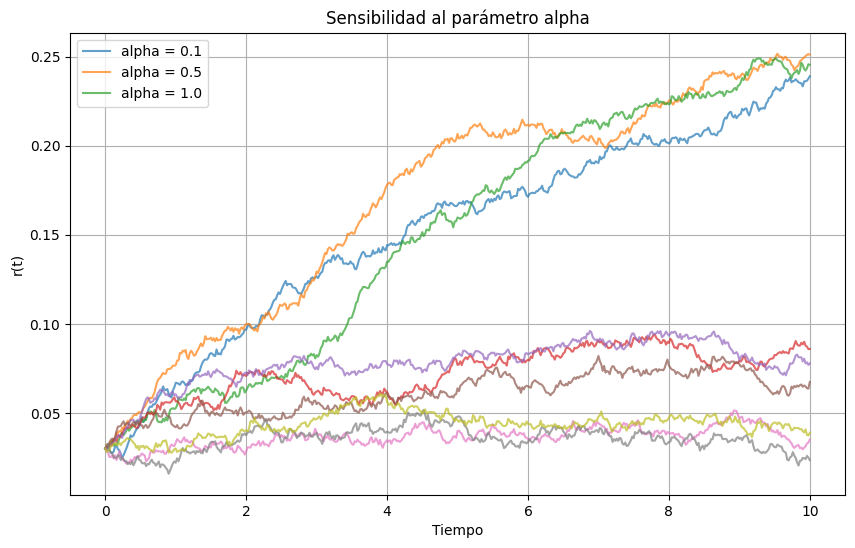

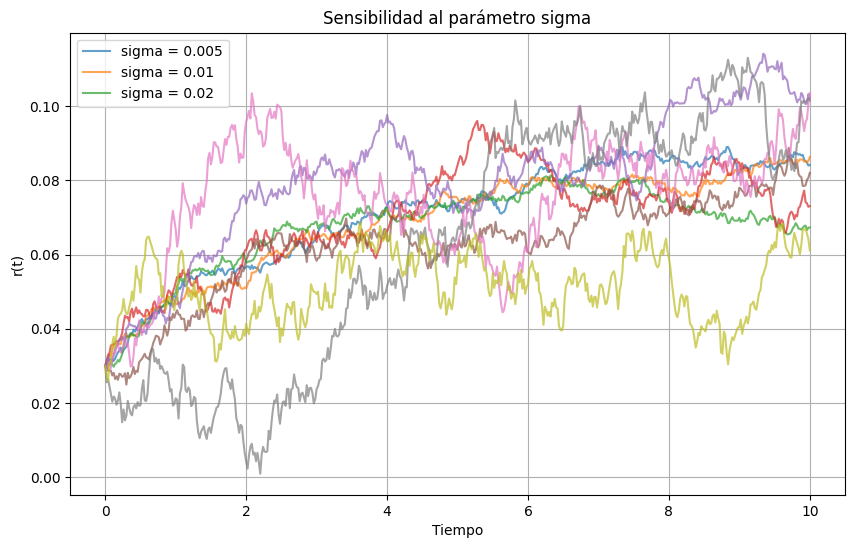

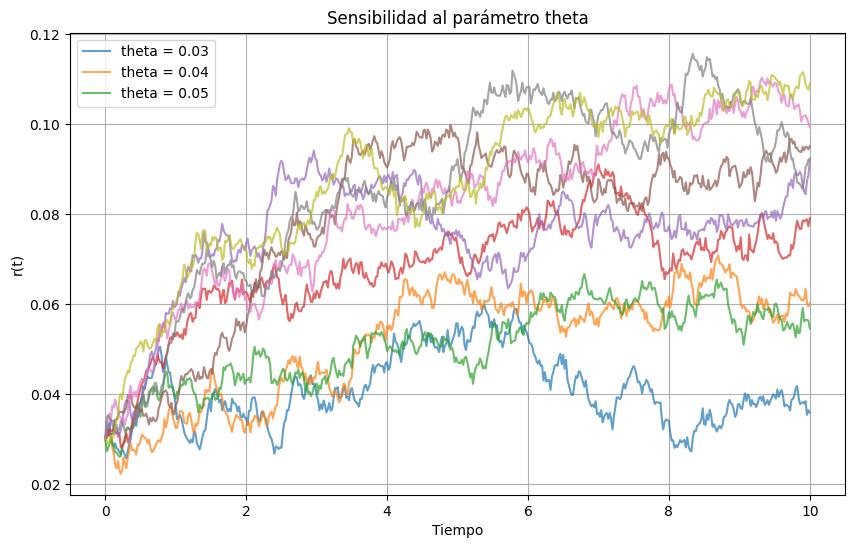

In [1]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import os

# Crear carpeta para guardar imágenes
output_dir = "graficas_sensibilidad"
os.makedirs(output_dir, exist_ok=True)

# Fijamos parámetros generales
T = 10
N = 500
dt = T / N
t = np.linspace(0, T, N+1)
r0 = 0.03
theta = 0.04
alpha = 0.5
sigma = 0.01

# Conjuntos de valores para análisis de sensibilidad
alphas = [0.1, 0.5, 1.0]
sigmas = [0.005, 0.01, 0.02]
thetas = [0.03, 0.04, 0.05]

#Corremos las simulaciones con diferentes valores de los parámetros
def simulate_hull_white(r0, alpha, sigma, theta, N, dt, M=10):
    r = np.zeros((M, N+1))
    r[:, 0] = r0
    for i in range(N):
        z = np.random.normal(0, 1, M)
        r[:, i+1] = r[:, i] + (theta - alpha * r[:, i]) * dt + sigma * np.sqrt(dt) * z
    return r

#Se grafican las simulaciones de los análisis de sensibilidad
def plot_sensitivity(param_name, param_values, fixed_params):
    plt.figure(figsize=(10, 6))
    for val in param_values:
        kwargs = dict(fixed_params)
        kwargs[param_name] = val
        r = simulate_hull_white(**kwargs, M=10)
        for i in range(3):  # Solo algunas trayectorias para claridad
            plt.plot(t, r[i], alpha=0.7)
    plt.title(f'Sensibilidad al parámetro {param_name}')
    plt.xlabel('Tiempo')
    plt.ylabel('r(t)')
    plt.grid(True)
    plt.legend([f'{param_name} = {v}' for v in param_values])


# Ejecutar el análisis de sensibilidad de cada parámetro
plot_sensitivity('alpha', alphas, {'r0': r0, 'sigma': sigma, 'theta': theta, 'N': N, 'dt': dt})
plot_sensitivity('sigma', sigmas, {'r0': r0, 'alpha': alpha, 'theta': theta, 'N': N, 'dt': dt})
plot_sensitivity('theta', thetas, {'r0': r0, 'alpha': alpha, 'sigma': sigma, 'N': N, 'dt': dt})

